In [4]:
import numpy as np
import visualkeras as vk
import pandas as pd
import seaborn as sn
from keras.models import Sequential
from matplotlib import pyplot as plt
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Load numpy files

In [5]:
train_data=np.load("numpy/train_data.npy")
train_labels=np.load("numpy/train_labels.npy")
test_data=np.load("numpy/test_data.npy")
test_labels=np.load("numpy/test_labels.npy")

# Feature extraction and Classification

In [6]:
model=Sequential()

model.add(Conv2D(32, (5,5),input_shape=(28,28,1),activation="relu"))
model.add(BatchNormalization())

model.add(Conv2D(32,(5,5), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Flatten())

model.add(Dense(256, activation="relu"))
model.add(Dense(36, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 batch_normalization (BatchN  (None, 24, 24, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 32)        25632     
                                                                 
 batch_normalization_1 (Batc  (None, 20, 20, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 32)       0         
 )                                                               
                                                        

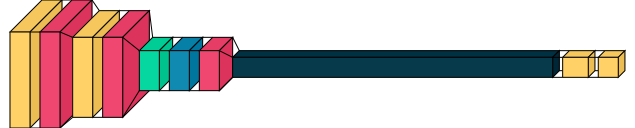

In [7]:
vk.layered_view(model)

# Create Checkpoints

In [8]:
best_loss_checkpoint=ModelCheckpoint(
    filepath="model/best_loss_model.h5",
    monitor="loss",
    save_best_only=True,
    save_weights_only=True,
    mode="min"
)

best_val_loss_checkpoint=ModelCheckpoint(
    filepath="model/best_val_loss_model.h5",
    monitor="val_loss",
    save_best_only=True,
    save_weights_only=True,
    mode="min"
)

# Train model

In [9]:
history=model.fit(
    train_data,
    train_labels,
    validation_data=(test_data,test_labels),
    epochs=10,
    batch_size=200,
    callbacks=[best_loss_checkpoint,best_val_loss_checkpoint]
)

Epoch 1/10
1770/1770 [==============================] - 419s 237ms/step - loss: 0.1576 - accuracy: 0.9550 - val_loss: 0.0809 - val_accuracy: 0.9760
Epoch 2/10
1770/1770 [==============================] - 460s 260ms/step - loss: 0.0719 - accuracy: 0.9788 - val_loss: 0.0648 - val_accuracy: 0.9804
Epoch 3/10
1770/1770 [==============================] - 484s 273ms/step - loss: 0.0519 - accuracy: 0.9838 - val_loss: 0.0602 - val_accuracy: 0.9829
Epoch 4/10
1770/1770 [==============================] - 491s 278ms/step - loss: 0.0404 - accuracy: 0.9872 - val_loss: 0.0562 - val_accuracy: 0.9850
Epoch 5/10
1770/1770 [==============================] - 491s 277ms/step - loss: 0.0327 - accuracy: 0.9894 - val_loss: 0.0483 - val_accuracy: 0.9868
Epoch 6/10
1770/1770 [==============================] - 490s 277ms/step - loss: 0.0271 - accuracy: 0.9911 - val_loss: 0.0490 - val_accuracy: 0.9867
Epoch 7/10
1770/1770 [==============================] - 475s 269ms/step - loss: 0.0240 - accuracy: 0.9920 - val_

# Epoch of loss and validation loss

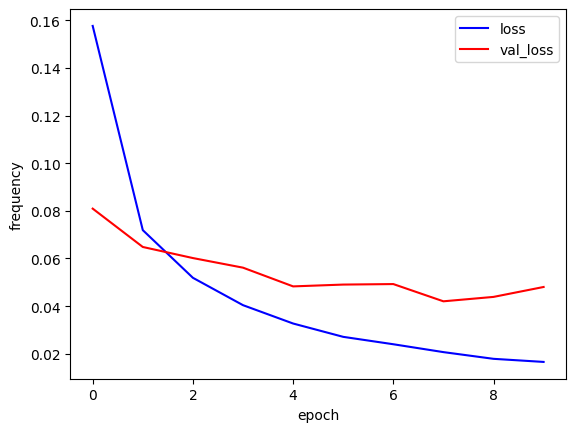

In [10]:
plt.plot(history.history["loss"],'b',label="loss")
plt.plot(history.history["val_loss"],'r',label="val_loss")
plt.xlabel("epoch")
plt.ylabel("frequency")
plt.legend()
plt.show()

# Epoch of accuracy and validation acccuracy

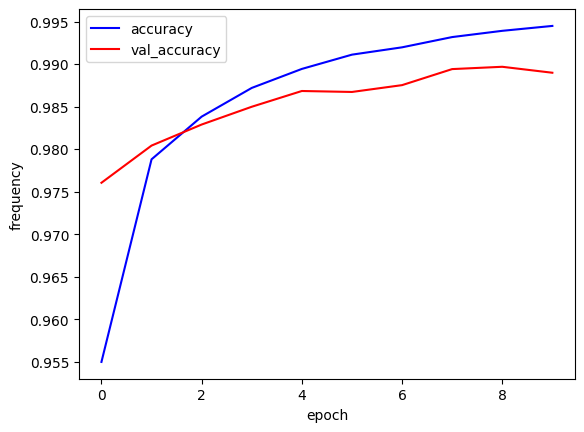

In [13]:
plt.plot(history.history["accuracy"],'b',label="accuracy")
plt.plot(history.history["val_accuracy"],'r',label="val_accuracy")
plt.xlabel("epoch")
plt.ylabel("frequency")
plt.legend()
plt.show()

In [14]:
model.load_weights("model/best_val_loss_model.h5")

In [15]:
loss, acc=model.evaluate(test_data, test_labels)
print(loss, acc)

2766/2766 [==============================] - 25s 9ms/step - loss: 0.0420 - accuracy: 0.9894
0.042023830115795135 0.9894112348556519


In [16]:
predictions=model.predict(test_data)

2766/2766 [==============================] - 25s 9ms/step


In [17]:
confusion=confusion_matrix(
    np.argmax(test_labels,axis=1),
    np.argmax(predictions,axis=1)
)
print(confusion)

[[2772    0    0 ...    0    0    0]
 [   1 1706    0 ...    0    4    0]
 [   2    0 4722 ...    0    0    0]
 ...
 [   0    0    0 ... 1418    2   12]
 [   0    0    0 ...    1 1367    5]
 [   0    0    0 ...    3    2 1356]]


<AxesSubplot: xlabel='predicted', ylabel='actual'>

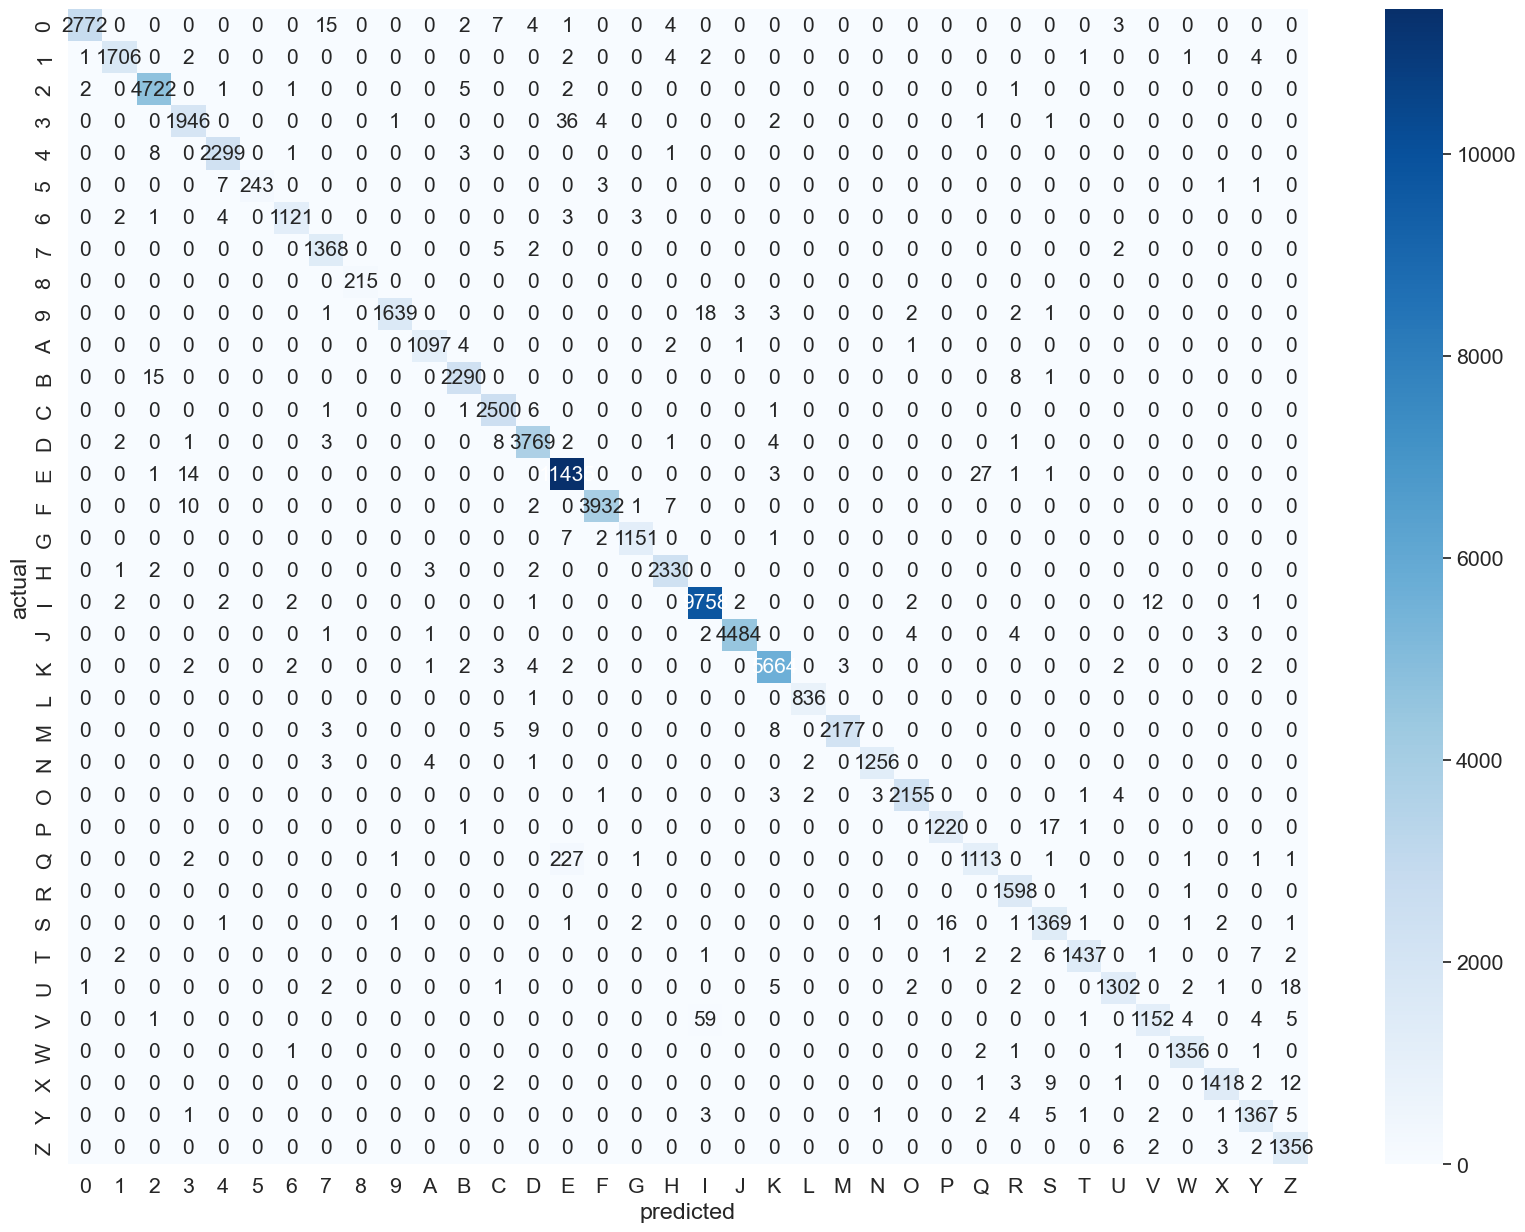

In [18]:
labels=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','0','1','2','3','4','5','6','7','8','9']

df_cm=pd.DataFrame(confusion, columns=np.unique(labels),index=np.unique(labels))
df_cm.index.name='actual'
df_cm.columns.name='predicted'
plt.figure(figsize=(20,15))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size":15}, fmt="d")